# Tarefa 02

#### 1. Monte um passo a passo para o algoritmo RF
#### 2. Explique com suas palavras o Random forest
#### 3. Qual a diferença entre Bagging e Random Forest?
#### 4. (Opcional) Implementar em python o Random Forest 
    – Bootstrap
    – Feature selection
    – Modelagem com Decision trees
    – Agregação

#### 1. Montando um passo a passo para o algoritmo RF

1. ajuste a base de dados ao algoritmo da Random Forest;
2. defina os paramametros para o algoritmo do Random Forest (ex:n_estimators=100, max_features='sqrt', random_state=100);
3. separe as bases de treino para o Random Forest: através de sorteio com reposição;
3. aplique o algoritmo do Random Forest em cada base de treino, gerando vários modelos; e
4. realize a votação caso o algoritmo seja de classificação ou a média caso seja um algoritmo de regressão.

#### 2. Explicando o Random forest

A Random Forest é uma das técnicas de ensemble learning que cria várias árvores de decisão para tornar o resultado mais genérico, evitando que o modelo gerado fique viciado à base de treino; melhorando a performance do algoritmo pois dificulta a ocorrência de overfitting. 
As diversas bases de treino são geradas por amostragem aleatória com reposição, tanto nas linhas quanto nas colunas. 
A agregação ocorre por votação para os algoritmos de classificação ou pela média para os de regressão.

#### 3. Qual a diferença entre Bagging e Random Forest?

A Random Forest pode ser considerada com uma das formas de aplicar a técnica Bagging. Ou seja, a Random Forest está dentro das possibilidades da Bagging.

#### 4. Implementando em python o código do Random Forest

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [2]:
# Carregando base de dados 'demo01.csv'
df = pd.read_csv('demo01_dummy.csv')
df_linhas, df_col = df.shape   # Consultando o número de linhas e colunas
print('A base de dados tem', df_linhas,'linhas e', df_col,'colunas')
df.head()

A base de dados tem 16650 linhas e 34 colunas


,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,1,0,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0


In [3]:
# Excluíndo coluna "Unnamed: 0"
df.drop("Unnamed: 0",axis = 1, inplace = True)
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0


In [4]:
# Ajustando a coluna 'mau' para do tipo 'inteiro'
df.mau = df.mau.astype(int)
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
# Separando as variáveis
y = df.mau
X = df.drop('mau',axis=1)

In [6]:
# Separando 70% da base para treinamento e 30% para validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:
# Criando e treinando com o parâmetro 'max_features = "sqrt"'
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=100)

In [8]:
# Treinando os modelos com os dados separados para treinamento
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [9]:
# Visualizando o valor de 'm'
rf_m = rf.estimators_
max_features_sqrt = [tree.max_features_ for tree in rf_m]
m = sum(max_features_sqrt)/len(max_features_sqrt)
print('A quantidade de colunas selecionadas aleatoriamente foi: ',m)

A quantidade de colunas selecionadas aleatoriamente foi:  5.0


#### A partir daqui vamos apresentar os resultados individuais para melhor compreensão do Random Forest

In [10]:
# Obtendo os estimadores individuais.
modelo_clf = rf.estimators_

In [11]:
# Separando uma linha da base de teste
X_teste = X_test.iloc[0].to_frame().transpose()

In [12]:
# Ajustando a linha para aplicação do predict
X_teste_modelo = X_teste.values

In [13]:
# Gerando a lista das previsões de cada modelo
lista = []
for i, modelo in enumerate(modelo_clf):
    y_pred = modelo.predict(X_teste_modelo)
    lista.append(y_pred)

In [14]:
# Gerando DataFrame com as previsões
y_lista = pd.DataFrame(lista).rename(columns={0: 'previsão'})
y_lista.head()

,previsão
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [15]:
# Identificando a maior ocorrência
y_lista.value_counts()

previsão
0.0         99
1.0          1
Name: count, dtype: int64

In [16]:
# Verificando o resultado da previsão sem a separação individual, 
# tendo em vista que a implementação 'RandomForestClassifier' já faz todo o trabalho.
y_pred_rf = rf.predict(X_teste)
y_pred_rf

array([0])

**Análise:** o resultado obtido foi '0', a maior ocorrência observada nos modelos.

In [17]:
# Verificando a acurácia do Random Forest para a base de treino
predict_train = rf.predict(X_train)
accuracy_score(y_train, predict_train)

0.991076791076791

In [18]:
# Verificando a acurácia do Random Forest para a base de teste
predict = rf.predict(X_test)
accuracy_score(y_test, predict)

0.9743743743743744

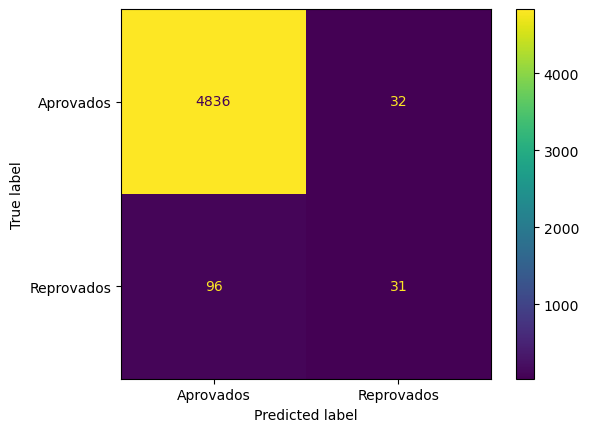

In [19]:
# Visualizando a matriz de classificação
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()